<a href="https://colab.research.google.com/github/RukmalRt/Excel-Salas-Analytics/blob/main/airline_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [444]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import plotly.express as px

In [445]:
df = pd.read_csv('/content/drive/MyDrive/BDA_Assignment/Airline_Review.csv')
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [446]:
df.sample()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
795,E Smyth,London to Gibraltar,Business Class,10.0,Trip Verified,Flight was good,"London to Gibraltar. Check in at T3 was fine, ...",A320,Family Leisure


In [447]:
df.tail()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes
3579,Michael Dielissen,NaN,NaN,8.0,NaN,British Airways customer review,YYZ to LHR - July 2012 - I flew overnight in p...,Premium Economy,yes


In [448]:
df.describe()

,Rating
count,3575.000000
mean,4.790490
std,3.170323
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [449]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_type', 'Class'],
      dtype='object')

In [450]:
df.isnull().sum()

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

In [451]:
df.shape

(3580, 9)

In [452]:
df_verified = df['Verified']
df_verified

0       Trip Verified
1       Trip Verified
2       Trip Verified
3        Not Verified
4       Trip Verified
            ...      
3575              NaN
3576              NaN
3577              NaN
3578              NaN
3579              NaN
Name: Verified, Length: 3580, dtype: object

In [453]:
df['Verified'].value_counts()

Verified
Trip Verified    1067
Not Verified      203
Name: count, dtype: int64

In [454]:
df.dtypes

Passanger_Name     object
Flying_month       object
Route              object
Rating            float64
Verified           object
Review_title       object
Review_content     object
Traveller_type     object
Class              object
dtype: object

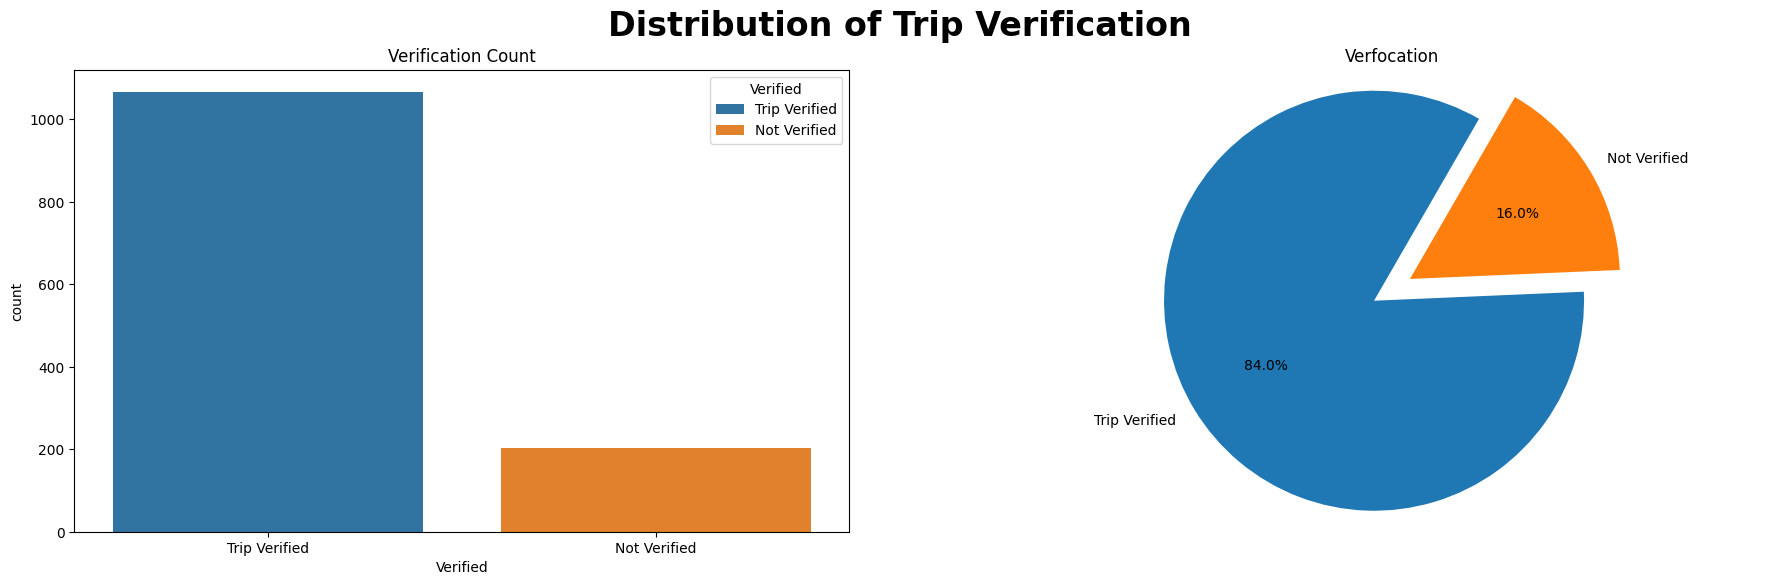

In [455]:
fig = plt.figure(figsize = (22,6))
plt.suptitle('Distribution of Trip Verification', weight = 'bold', fontsize = '24')
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Verification Count')
sns.countplot(x='Verified', data=df, ax = ax1, hue ='Verified')

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Verfocation')
label = list(df['Verified'].value_counts().index)
value= list(df['Verified'].value_counts().values)
ax2.pie(value, labels=label, autopct = '%1.1f%%', explode = (0, 0.2), startangle = 60)
ax2.axis('equal')
plt.show()

In [456]:
df_var = df[['Verified', 'Rating']]
df_var1 = df_var.groupby('Verified').mean().reset_index()

In [457]:
df_var1

,Verified,Rating
0,Not Verified,3.847291
1,Trip Verified,4.354264


In [458]:
df_var2 = df_var.groupby('Verified').agg(lambda x: x.mode()[0]).reset_index()

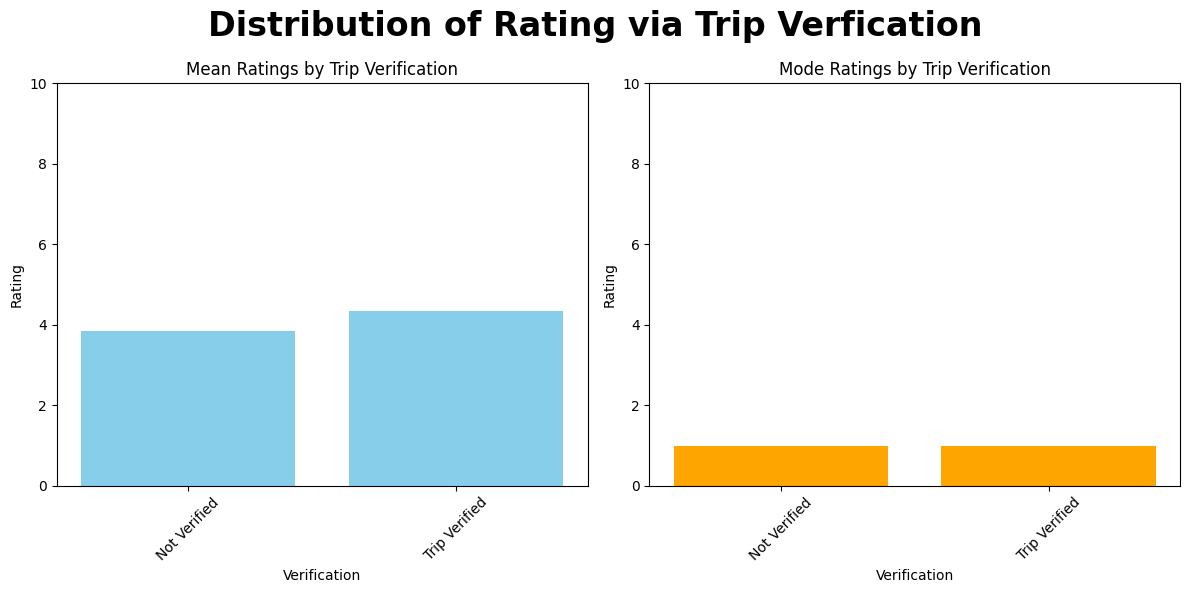

In [459]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.suptitle('Distribution of Rating via Trip Verfication', weight = 'bold', fontsize = '24')
# Plotting mean ratings
axes[0].bar(df_var1['Verified'], df_var1['Rating'], color='skyblue')
axes[0].set_title('Mean Ratings by Trip Verification')
axes[0].set_xlabel('Verification')
axes[0].set_ylabel('Rating')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 10)  # Set y-axis limits to (0, 10)

# Plotting mode ratings
axes[1].bar(df_var2['Verified'], df_var2['Rating'], color='orange')
axes[1].set_title('Mode Ratings by Trip Verification')
axes[1].set_xlabel('Verification')
axes[1].set_ylabel('Rating')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 10)  # Set y-axis limits to (0, 10)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [460]:
df['Flying_month']

0                     Jun-23
1                     Mar-23
2         Heathrow to Bodrum
3                     Jun-23
4       London City to Ibiza
                ...         
3575                     NaN
3576                     NaN
3577                     NaN
3578                     NaN
3579                     NaN
Name: Flying_month, Length: 3580, dtype: object

In [461]:
df['Flying_month'] = df['Flying_month'].astype(str)

In [462]:
def split_month(flying_month):
  if '-' in flying_month:
    return flying_month.split('-')[0]
  else:
    return None

df['Month'] = df['Flying_month'].apply(split_month)

In [463]:
df['Month'] = df['Month'].fillna('Not Given')

In [464]:
df['Month'].value_counts()

Month
Not Given           2620
Mar                   94
Jun                   92
Sep                   89
Dec                   87
Aug                   85
May                   85
Nov                   81
Apr                   77
Jul                   73
Oct                   70
Jan                   60
Feb                   54
LHR                    4
London                 2
Warsaw to London       1
LHR                    1
YVR                    1
MAN                    1
ORD                    1
GLA                    1
FRA                    1
Name: count, dtype: int64

In [465]:
df['Month'] = df['Month'].str.replace(r'\b\w*LHR\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*London\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*Warsaw\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*YVR\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*MAN\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*GLA\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*FRA\w*\b', '', regex=True).str.strip()
df['Month'] = df['Month'].str.replace(r'\b\w*to\w*\b', '', regex=True).str.strip()

In [466]:
df['Month'] = df['Month'].str.replace(r'\b\w*ORD\w*\b', '', regex=True).str.strip()

In [467]:
df['Month'] = df['Month'].fillna('Not Given')

In [468]:
df['Month'].value_counts()

Month
Not Given    2620
Mar            94
Jun            92
Sep            89
Dec            87
May            85
Aug            85
Nov            81
Apr            77
Jul            73
Oct            70
Jan            60
Feb            54
               13
Name: count, dtype: int64

In [469]:
def split_year(flying_year):
  if '-' in flying_year:
    return flying_year.split('-')[1]
  else:
    return None

df['Year'] = df['Flying_month'].apply(split_year)

In [470]:
df.dtypes

Passanger_Name     object
Flying_month       object
Route              object
Rating            float64
Verified           object
Review_title       object
Review_content     object
Traveller_type     object
Class              object
Month              object
Year               object
dtype: object

In [471]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].fillna(0).astype(int)

In [472]:
df['Year'] = df['Year'] + 2000

In [473]:
df['Year'].replace(2000, 'Not Given', inplace = True)
df['Year']

0            2023
1            2023
2       Not Given
3            2023
4       Not Given
          ...    
3575    Not Given
3576    Not Given
3577    Not Given
3578    Not Given
3579    Not Given
Name: Year, Length: 3580, dtype: object

<Axes: title={'center': 'Years'}, xlabel='Year'>

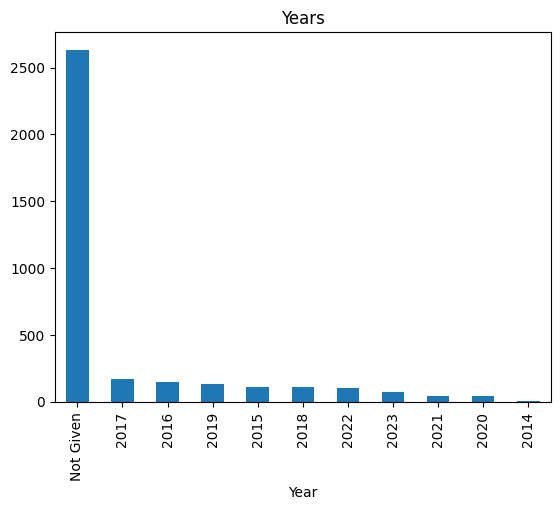

In [474]:
df['Year'].value_counts().plot(kind = 'bar', title = 'Years')

### **Analysis of Flight Classes**

In [475]:
df['Class'].value_counts()

Class
Economy Class                              676
Couple Leisure                             641
Solo Leisure                               553
yes                                        441
Business                                   430
no                                         322
Family Leisure                             234
Business Class                             183
Premium Economy                             85
First Class                                 11
London to Malaga                             1
LHR to ORD                                   1
Los Angeles to London to Paris to Rome       1
Name: count, dtype: int64

In [476]:
df['Class'] = df['Class'].astype(str)

In [477]:
def exact_flight_class(class_name):
  if 'economy' in class_name.lower():
    return 'Economy Class'
  elif 'business' in class_name.lower():
    return 'Business Class'
  elif 'premium' in class_name.lower():
    return 'Premium Economy'
  elif 'first' in class_name.lower():
    return 'First Class'
  else:
    return None

df['Flight_classes'] = df['Class'].apply(exact_flight_class)

<Axes: xlabel='Flight_classes'>

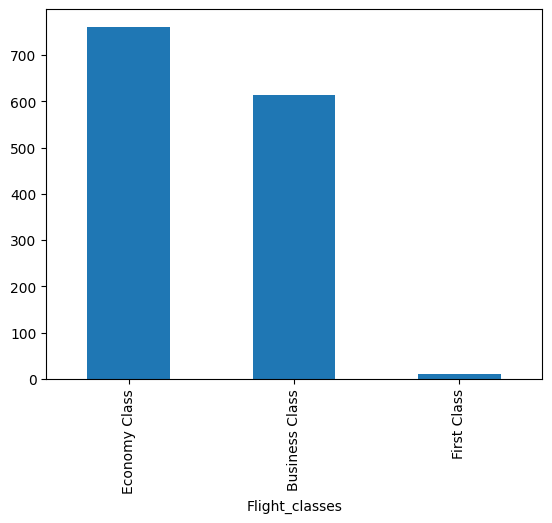

In [478]:
df['Flight_classes'].value_counts().plot(kind = 'bar')

In [479]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,None
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,nan,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Not Given,Not Given,None
3576,S Luqman,nan,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Not Given,Not Given,None
3577,D Smith,nan,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Not Given,Not Given,None
3578,W Benson,nan,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Not Given,Not Given,None


In [480]:
df['Route'].head(20)

0                        New Orleans to London
1                              London to Amman
2                               Business Class
3                              Amman to London
4                               Business Class
5                         London to Washington
6                               Business Class
7                                Economy Class
8                           London to Funchal 
9     Marseille to Seattle via London Heathrow
10                            Cairo to London 
11              Bucharest to Dallas via London
12                           Gatwick to Venice
13                       Dublin to London City
14            Tokyo to Manchester via Heathrow
15                     San Francisco to London
16                               Economy Class
17                  Seattle to Nice via London
18    Sydney via Singapore to London Heathrow 
19                               Economy Class
Name: Route, dtype: object

In [481]:
df['Flight_classes'].head(20)

0      Economy Class
1     Business Class
2               None
3      Economy Class
4               None
5      Economy Class
6     Business Class
7               None
8      Economy Class
9      Economy Class
10    Business Class
11     Economy Class
12     Economy Class
13     Economy Class
14    Business Class
15     Economy Class
16              None
17     Economy Class
18     Economy Class
19    Business Class
Name: Flight_classes, dtype: object

In [482]:
df['Route'] = df['Route'].astype(str)

In [483]:
for index, row in df.iterrows():
    if 'Class' in row['Route']:
        df.at[index, 'Flight_classes'] = row['Route']



In [484]:
for index, row in df.iterrows():
    if 'Premium' in row['Route']:
        df.at[index, 'Flight_classes'] = row['Route']


In [485]:
df['Flight_classes'].head(20)

0      Economy Class
1     Business Class
2     Business Class
3      Economy Class
4     Business Class
5      Economy Class
6     Business Class
7      Economy Class
8      Economy Class
9      Economy Class
10    Business Class
11     Economy Class
12     Economy Class
13     Economy Class
14    Business Class
15     Economy Class
16     Economy Class
17     Economy Class
18     Economy Class
19     Economy Class
Name: Flight_classes, dtype: object

<Axes: xlabel='Flight_classes'>

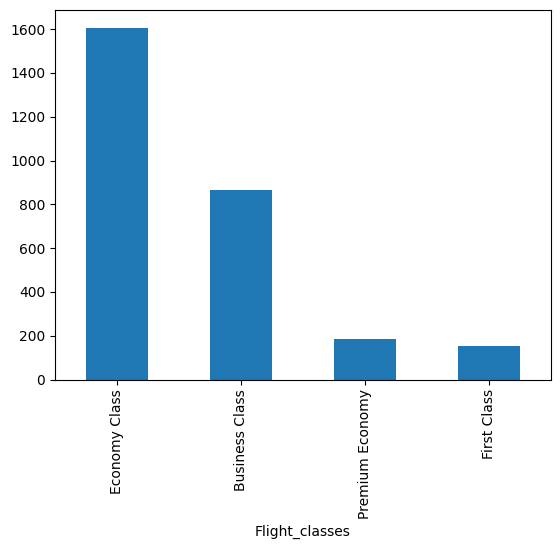

In [486]:
df['Flight_classes'].value_counts().plot(kind = 'bar')

In [487]:
df['Route'].value_counts().head(50)

Route
Economy Class                     846
nan                               764
Business Class                    683
Premium Economy                   186
First Class                       143
New York to London                  6
Amsterdam to London                 6
Hong Kong to London                 5
London to Delhi                     5
London to Madrid                    5
Rome to London                      5
Zurich to London                    5
London to Toronto                   5
Singapore to London                 5
Los Angeles to London               5
London to Tampa                     5
Vienna to London                    4
London to Cape Town                 4
Gatwick to Cancun                   4
London to Hong Kong                 4
BKK to LHR                          4
LHR to BKK                          4
London to Istanbul                  4
Frankfurt to London                 4
London to Singapore                 4
London to Dubai                     4
San Fr

In [488]:
df['Route'] = df['Route'].str.replace(r'\b\w*Class\w*\b', '', regex=True).str.strip()

In [489]:
df['Route'] = df['Route'].str.replace(r'\b\w*Business\w*\b', '', regex=True).str.strip()

In [490]:
df['Route'] = df['Route'].str.replace(r'\b\w*Economy\w*\b', '', regex=True).str.strip()

In [491]:
df['Route'] = df['Route'].str.replace(r'\b\w*First\w*\b', '', regex=True).str.strip()

In [492]:
df['Route']  = df['Route'].str.replace(r'\b\w*Premium\w*\b', '', regex=True).str.strip()

In [493]:
df['Route'].value_counts().head(20)

Route
                         1858
nan                       764
New York to London          6
Amsterdam to London         6
London to Madrid            5
Hong Kong to London         5
Rome to London              5
London to Delhi             5
London to Tampa             5
Los Angeles to London       5
London to Toronto           5
Singapore to London         5
Zurich to London            5
London to Vienna            4
BKK to LHR                  4
London to Singapore         4
London to Amsterdam         4
London to Dubai             4
Frankfurt to London         4
London to Hong Kong         4
Name: count, dtype: int64

In [494]:
df[['Flying_month', 'Route']].head(20)

,Flying_month,Route
0,Jun-23,New Orleans to London
1,Mar-23,London to Amman
2,Heathrow to Bodrum,
3,Jun-23,Amman to London
4,London City to Ibiza,
5,Jun-23,London to Washington
6,Amsterdam to London,
7,London Heathrow to Kalamata,
8,Jun-23,London to Funchal
9,Jun-23,Marseille to Seattle via London Heathrow


In [495]:
for index, row in df.iterrows():
    if 'to' in row['Flying_month']:
        df.at[index, 'Route'] = row['Flying_month']
        df.at[index, 'Flying_month'] = None


In [496]:
df['Route'].fillna("Not Given", inplace = True)
df['Route']

0       New Orleans to London
1             London to Amman
2          Heathrow to Bodrum
3             Amman to London
4        London City to Ibiza
                ...          
3575                      nan
3576                      nan
3577                      nan
3578                      nan
3579                      nan
Name: Route, Length: 3580, dtype: object

In [497]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,nan,nan,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Not Given,Not Given,None
3576,S Luqman,nan,nan,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Not Given,Not Given,None
3577,D Smith,nan,nan,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Not Given,Not Given,None
3578,W Benson,nan,nan,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Not Given,Not Given,None


In [498]:
df['Traveller_type'].value_counts()

Traveller_type
A320                   342
Economy Class          327
Couple Leisure         308
Solo Leisure           307
Business Class         295
                      ... 
A321Neo                  1
A319 / Boeing 787-8      1
Boeing 757               1
A319/320                 1
no                       1
Name: count, Length: 203, dtype: int64

In [499]:
for index, row in df.iterrows():
    if 'Class' in row['Traveller_type']:
        df.at[index, 'Flight_classes'] = row['Traveller_type']

In [500]:
for index, row in df.iterrows():
    if 'Premium' in row['Traveller_type']:
        df.at[index, 'Flight_classes'] = row['Traveller_type']

In [501]:
df['Flight_classes'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3575    False
3576    False
3577    False
3578    False
3579    False
Name: Flight_classes, Length: 3580, dtype: bool

In [502]:
df['Traveller_type'] = df['Traveller_type'].str.replace(r'\b\w*Class\w*\b', '', regex=True).str.strip()
df['Traveller_type'] = df['Traveller_type'].str.replace(r'\b\w*Business\w*\b', '', regex=True).str.strip()
df['Traveller_type'] = df['Traveller_type'].str.replace(r'\b\w*Economy\w*\b', '', regex=True).str.strip()
df['Traveller_type'] = df['Traveller_type'].str.replace(r'\b\w*First\w*\b', '', regex=True).str.strip()
df['Traveller_type'] = df['Traveller_type'].str.replace(r'\b\w*Premium\w*\b', '', regex=True).str.strip()

In [503]:
df['Review_title'].value_counts().head(100)

Review_title
British Airways customer review                         952
never fly British Airways again                           5
Overall a good flight                                     5
BA has gone downhill                                      3
one of the worst experiences                              3
                                                       ... 
experience was excellent                                  1
1 hour in the horrific queue                              1
have once again been disappointed by British Airways      1
cabin staff stomp up and down the aisle                   1
too much cost cutting                                     1
Name: count, Length: 100, dtype: int64

In [504]:
class_mention = df['Review_title'].str.contains(r'\bclass\b', case = False)

In [505]:
class_mention.tail(50)

3530    False
3531    False
3532    False
3533    False
3534    False
3535    False
3536    False
3537    False
3538    False
3539    False
3540    False
3541    False
3542    False
3543    False
3544    False
3545    False
3546    False
3547    False
3548    False
3549    False
3550    False
3551    False
3552    False
3553    False
3554    False
3555    False
3556    False
3557    False
3558    False
3559    False
3560    False
3561    False
3562    False
3563    False
3564    False
3565    False
3566    False
3567    False
3568    False
3569    False
3570    False
3571    False
3572    False
3573    False
3574    False
3575    False
3576    False
3577    False
3578    False
3579    False
Name: Review_title, dtype: bool

In [506]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,nan,nan,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,no,Not Given,Not Given,Economy Class
3576,S Luqman,nan,nan,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,no,Not Given,Not Given,Economy Class
3577,D Smith,nan,nan,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,no,Not Given,Not Given,Economy Class
3578,W Benson,nan,nan,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,yes,Not Given,Not Given,Business Class


In [507]:
df['Flight_classes'].value_counts()

Flight_classes
Economy Class      1934
Business Class     1161
Premium Economy     273
First Class         210
Name: count, dtype: int64

In [508]:
df1 = df[['Flight_classes', 'Rating']]
df1 = df1.groupby('Flight_classes').mean().reset_index()

In [509]:
df1

,Flight_classes,Rating
0,Business Class,5.156034
1,Economy Class,4.331434
2,First Class,6.004785
3,Premium Economy,5.571429


In [510]:
df_class = df[['Flight_classes', 'Rating']]

In [511]:
df_class1 = df_class.groupby('Flight_classes').agg(lambda x: x.mode()[0]).reset_index()

In [512]:
df_class1

,Flight_classes,Rating
0,Business Class,1.0
1,Economy Class,1.0
2,First Class,9.0
3,Premium Economy,8.0


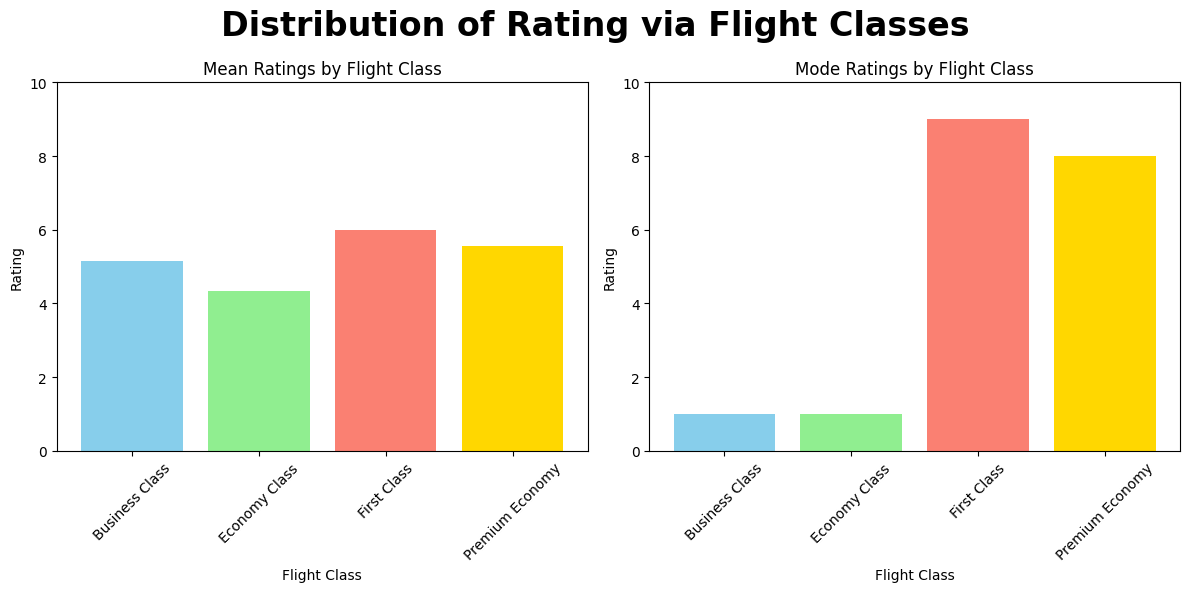

In [513]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.suptitle('Distribution of Rating via Flight Classes', weight = 'bold', fontsize = '24')
# Plotting mean ratings
axes[0].bar(df1['Flight_classes'], df1['Rating'], color=colors)
axes[0].set_title('Mean Ratings by Flight Class')
axes[0].set_xlabel('Flight Class')
axes[0].set_ylabel('Rating')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 10)  # Set y-axis limits to (0, 10)

# Plotting mode ratings
axes[1].bar(df_class1['Flight_classes'], df_class1['Rating'], color=colors)
axes[1].set_title('Mode Ratings by Flight Class')
axes[1].set_xlabel('Flight Class')
axes[1].set_ylabel('Rating')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 10)  # Set y-axis limits to (0, 10)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### **Trend of the Customer Behaviour**

In [514]:
df_year = df[['Year', 'Rating']]

In [515]:
df_year['Year'] = df_year['Year'].replace('Not Given', pd.NA)

<ipython-input-515-7925f9ffe8db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Year'] = df_year['Year'].replace('Not Given', pd.NA)


In [516]:
df_year.isnull().sum()

Year      2633
Rating       5
dtype: int64

In [517]:
df_year1 = df_year.groupby(['Year']).mean().reset_index()

In [518]:
df_year1.head(20)

,Year,Rating
0,2014,4.500000
1,2015,3.552632
2,2016,3.081081
3,2017,2.632184
4,2018,3.354545
5,2019,3.496241
6,2020,2.600000
7,2021,2.844444
8,2022,2.725490
9,2023,2.083333


In [519]:
df_year2 = df_year.groupby(['Year'])['Rating'].agg(lambda x: x.mode()[0]).reset_index()

In [520]:
df_year2

,Year,Rating
0,2014,4.0
1,2015,1.0
2,2016,1.0
3,2017,1.0
4,2018,1.0
5,2019,1.0
6,2020,1.0
7,2021,1.0
8,2022,1.0
9,2023,1.0


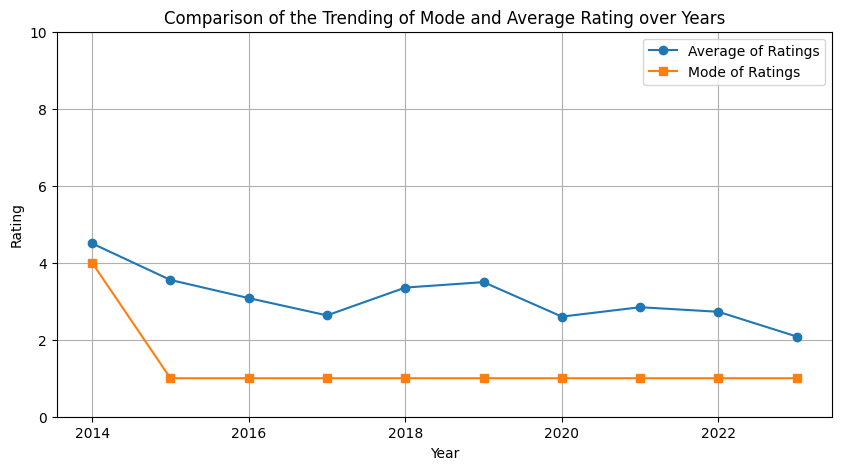

In [521]:
# Plotting the line graphs
plt.figure(figsize=(10, 5))
plt.plot(df_year1['Year'], df_year1['Rating'], marker='o', label='Average of Ratings')
plt.plot(df_year2['Year'], df_year2['Rating'], marker='s', label='Mode of Ratings')
plt.ylim(0,10)

# Adding title and labels
plt.title('Comparison of the Trending of Mode and Average Rating over Years')
plt.xlabel('Year')
plt.ylabel('Rating')

# Adding legend
plt.legend()

# Displaying the plot
plt.grid(True)

### **Customer Behaviour Variation According to the Month**

In [522]:
df_month = df[['Month', 'Rating']]


In [523]:
df_month['Month'] = df_month['Month'].replace('Not Given', pd.NA)
df_month['Month'] = df_month['Month'].replace('', pd.NA)

<ipython-input-523-827e79531fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month'] = df_month['Month'].replace('Not Given', pd.NA)
<ipython-input-523-827e79531fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month'] = df_month['Month'].replace('', pd.NA)


In [524]:
df_month1 = df_month.groupby(['Month']).mean().reset_index()

In [525]:
df_month1_sorted = df_month1.sort_values(by='Rating', ascending=False)

In [526]:
df_month1_sorted

,Month,Rating
10,Oct,3.471429
9,Nov,3.283951
11,Sep,3.224719
3,Feb,3.203704
1,Aug,3.164706
2,Dec,3.114943
7,Mar,2.904255
4,Jan,2.850000
8,May,2.835294
5,Jul,2.712329


In [527]:
df_month2 = df_month.groupby(['Month'])['Rating'].agg(lambda x: x.mode()[0]).reset_index()

In [528]:
df_month2

,Month,Rating
0,Apr,1.0
1,Aug,1.0
2,Dec,1.0
3,Feb,1.0
4,Jan,1.0
5,Jul,1.0
6,Jun,1.0
7,Mar,1.0
8,May,1.0
9,Nov,1.0


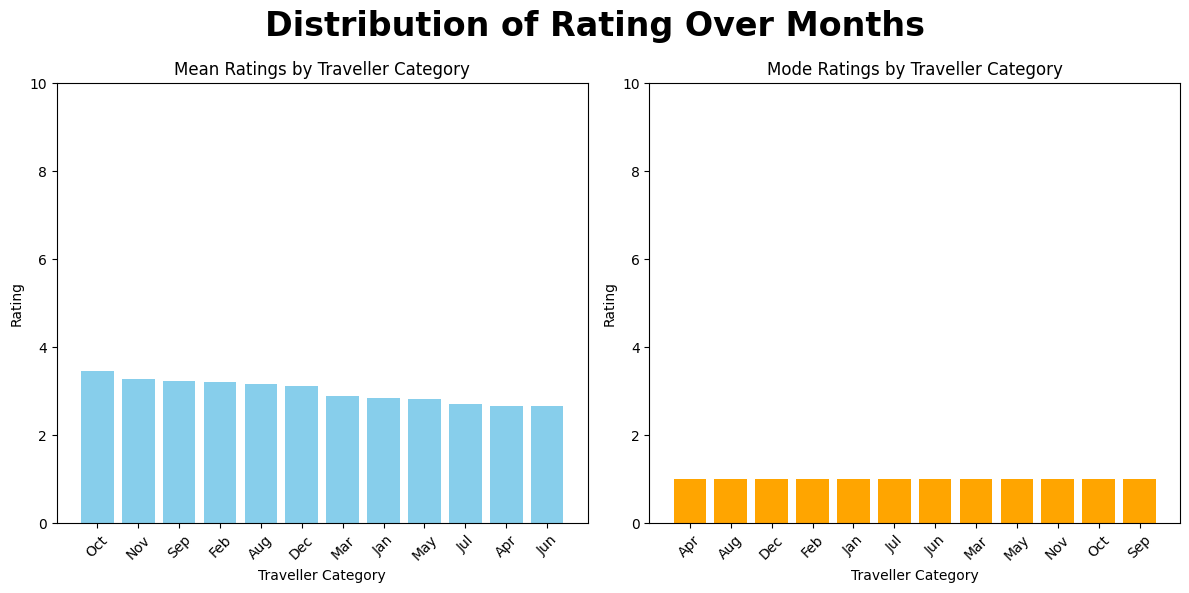

In [529]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.suptitle('Distribution of Rating Over Months', weight = 'bold', fontsize = '24')

# Plotting mean ratings
axes[0].bar(df_month1_sorted['Month'], df_month1_sorted['Rating'], color='skyblue')
axes[0].set_title('Mean Ratings by Traveller Category')
axes[0].set_xlabel('Traveller Category')
axes[0].set_ylabel('Rating')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 10)  # Set y-axis limits to (0, 10)

# Plotting mode ratings
axes[1].bar(df_month2['Month'], df_month2['Rating'], color='orange')
axes[1].set_title('Mode Ratings by Traveller Category')
axes[1].set_xlabel('Traveller Category')
axes[1].set_ylabel('Rating')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 10)  # Set y-axis limits to (0, 10)

plt.tight_layout()
plt.show()

### **Analysis of Traveller Types/Holliday Types**

In [530]:
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class


In [531]:
df['Traveller_type'].value_counts().head(50)

Traveller_type
                             958
A320                         342
Couple Leisure               308
Solo Leisure                 307
Boeing 777                   268
Boeing 747-400               182
A380                         160
Family Leisure               148
Boeing 777-200               123
A319                         109
Boeing 747                    85
A321                          75
Boeing 787                    64
Boeing 767                    41
Boeing 787-9                  38
Boeing 777-300                35
A350                          15
Boeing 777-300ER              13
Boeing 787-8                  10
Boeing 777-200ER               9
A321neo                        9
Boeing 747 400                 8
A380-800                       8
Boeing 787-900                 7
A320-200                       7
Boeing 737                     6
Boeing 787 / A320              6
A318                           5
A320 / Boeing 787              4
Boeing 737-800              

In [532]:
def traveller_type(type):
  if 'solo' in type.lower():
    return 'Solo Leisure'
  elif 'couple' in type.lower():
    return 'Couple Leisure'
  elif 'family' in type.lower():
    return 'Family Leisure'
  else:
    return None


df['Traveller_Category'] = df['Traveller_type'].apply(traveller_type)

In [533]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes,Traveller_Category
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class,Couple Leisure
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class,None
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,nan,nan,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,no,Not Given,Not Given,Economy Class,None
3576,S Luqman,nan,nan,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,no,Not Given,Not Given,Economy Class,None
3577,D Smith,nan,nan,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,no,Not Given,Not Given,Economy Class,None
3578,W Benson,nan,nan,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,yes,Not Given,Not Given,Business Class,None


In [534]:
for index, row in df.iterrows():
    if 'Leisure' in row['Class']:
        df.at[index, 'Traveller_Category'] = row['Class']

In [535]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes,Traveller_Category
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class,Couple Leisure
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,nan,nan,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,no,Not Given,Not Given,Economy Class,None
3576,S Luqman,nan,nan,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,no,Not Given,Not Given,Economy Class,None
3577,D Smith,nan,nan,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,no,Not Given,Not Given,Economy Class,None
3578,W Benson,nan,nan,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,yes,Not Given,Not Given,Business Class,None


In [536]:
df['Traveller_Category']

0         Solo Leisure
1       Couple Leisure
2         Solo Leisure
3         Solo Leisure
4       Family Leisure
             ...      
3575              None
3576              None
3577              None
3578              None
3579              None
Name: Traveller_Category, Length: 3580, dtype: object

In [537]:
df['Traveller_Category'].dropna()

0         Solo Leisure
1       Couple Leisure
2         Solo Leisure
3         Solo Leisure
4       Family Leisure
             ...      
2805      Solo Leisure
2806      Solo Leisure
2808    Couple Leisure
2810    Family Leisure
2815    Family Leisure
Name: Traveller_Category, Length: 2191, dtype: object

In [538]:
df['Traveller_Category']

0         Solo Leisure
1       Couple Leisure
2         Solo Leisure
3         Solo Leisure
4       Family Leisure
             ...      
3575              None
3576              None
3577              None
3578              None
3579              None
Name: Traveller_Category, Length: 3580, dtype: object

In [539]:
df['Traveller_Category'].value_counts()

Traveller_Category
Couple Leisure    949
Solo Leisure      860
Family Leisure    382
Name: count, dtype: int64

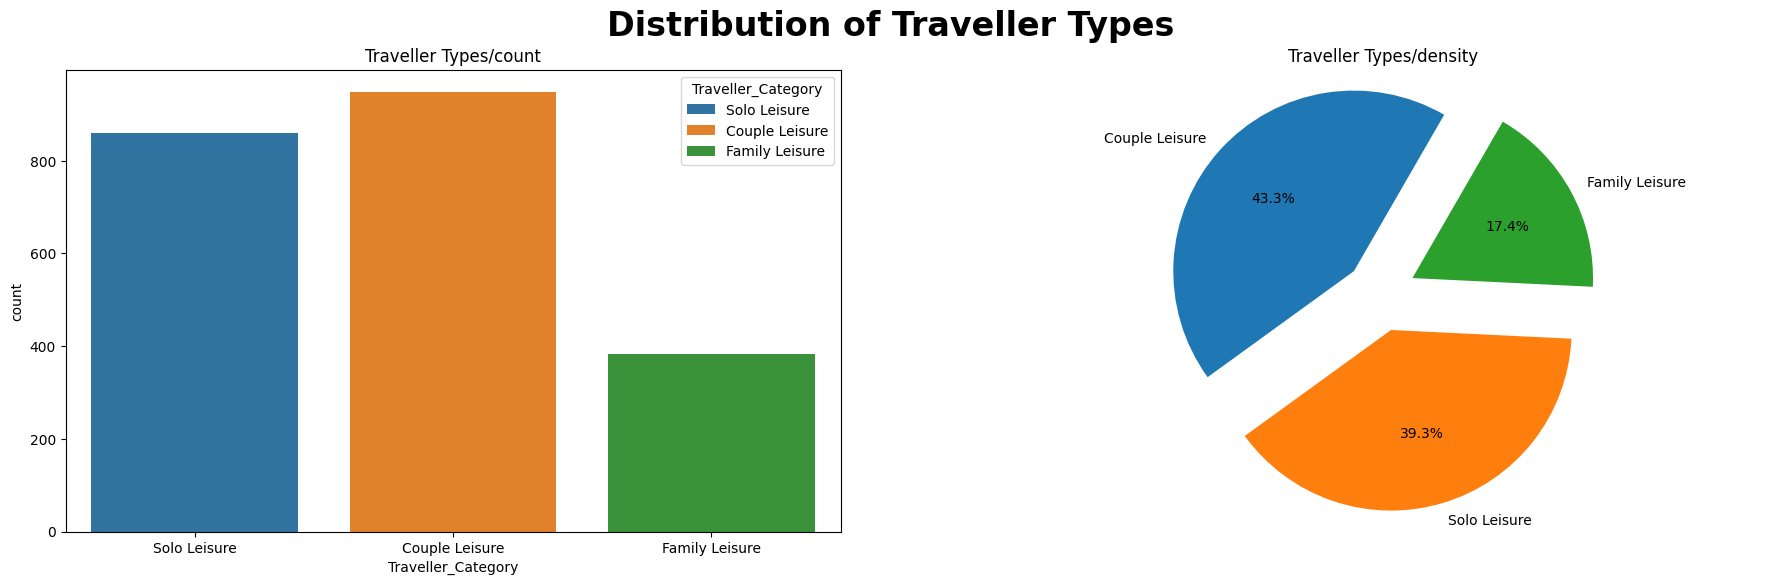

In [540]:
fig = plt.figure(figsize = (22,6))
plt.suptitle('Distribution of Traveller Types', weight = 'bold', fontsize = '24')
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)
ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Traveller Types/count')
sns.countplot(x='Traveller_Category', data=df, ax = ax1, hue ='Traveller_Category')

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Traveller Types/density')
label = list(df['Traveller_Category'].value_counts().index)
value= list(df['Traveller_Category'].value_counts().values)
ax2.pie(value, labels=label, autopct = '%1.1f%%', explode = (0.2, 0.2, 0.2), startangle = 60)
ax2.axis('equal')
plt.show()

### **Tavellor Satisfaction According to the Holliday/Traveller Type**

In [541]:
df_traveller = df[['Traveller_Category', 'Rating']]

In [542]:
df_traveller1 = df_traveller.groupby(['Traveller_Category']).mean().reset_index()

In [543]:
df_traveller1

,Traveller_Category,Rating
0,Couple Leisure,4.576396
1,Family Leisure,4.397906
2,Solo Leisure,5.074419


In [544]:
df_traveller2 = df_traveller.groupby(['Traveller_Category'])['Rating'].apply(lambda x: x.mode()[0])

In [545]:
df_traveller2

Traveller_Category
Couple Leisure    1.0
Family Leisure    1.0
Solo Leisure      1.0
Name: Rating, dtype: float64

In [546]:
# Define a function to calculate the mode
def calculate_mode(x):
    return x.mode()[0] if len(x.mode()) > 0 else None

# Grouping by 'Traveller_Category' and calculating the mode of 'Rating'
df_traveller4 = df_traveller.groupby('Traveller_Category').agg(mode=('Rating', calculate_mode)).reset_index()

df_traveller4

,Traveller_Category,mode
0,Couple Leisure,1.0
1,Family Leisure,1.0
2,Solo Leisure,1.0


In [547]:
df_traveller1

,Traveller_Category,Rating
0,Couple Leisure,4.576396
1,Family Leisure,4.397906
2,Solo Leisure,5.074419


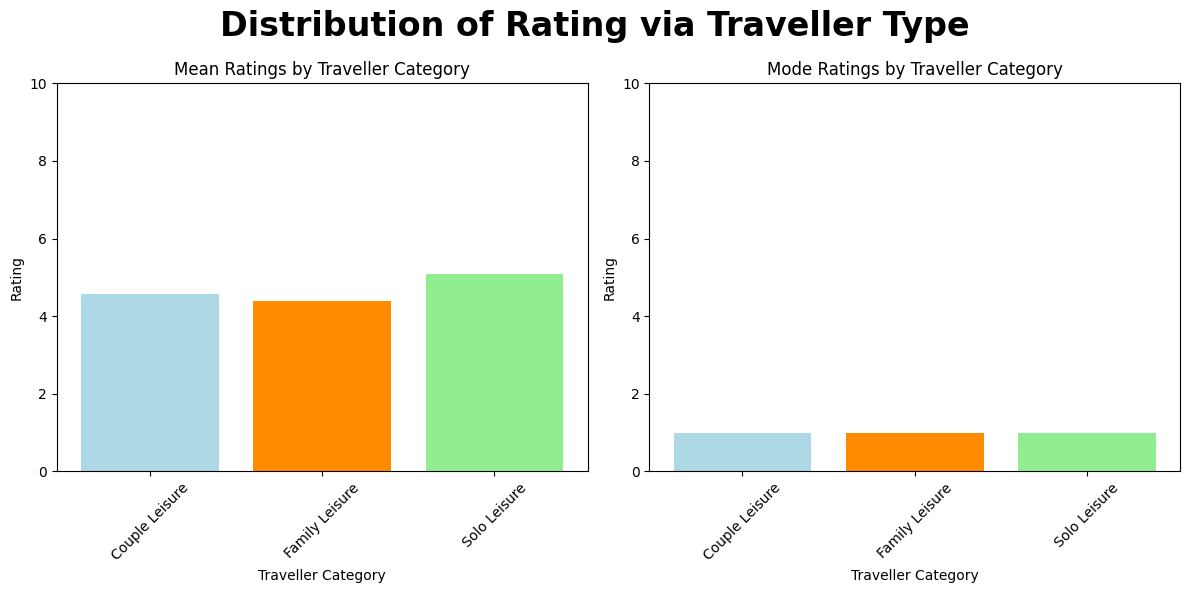

In [548]:
colours1 = ['lightblue', 'darkorange', 'lightgreen']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.suptitle('Distribution of Rating via Traveller Type', weight = 'bold', fontsize = '24')

# Plotting mean ratings
axes[0].bar(df_traveller1['Traveller_Category'], df_traveller1['Rating'], color=colours1)
axes[0].set_title('Mean Ratings by Traveller Category')
axes[0].set_xlabel('Traveller Category')
axes[0].set_ylabel('Rating')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 10)  # Set y-axis limits to (0, 10)

# Plotting mode ratings
axes[1].bar(df_traveller4['Traveller_Category'], df_traveller4['mode'], color=colours1)
axes[1].set_title('Mode Ratings by Traveller Category')
axes[1].set_xlabel('Traveller Category')
axes[1].set_ylabel('Rating')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 10)  # Set y-axis limits to (0, 10)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [549]:
df_traveller2

Traveller_Category
Couple Leisure    1.0
Family Leisure    1.0
Solo Leisure      1.0
Name: Rating, dtype: float64

In [550]:
df_traveller3 = df_traveller.groupby('Traveller_Category').agg({'Rating': ['mean', lambda x: x.mode()[0]]})

In [551]:
df_traveller3.rename(columns={'<lambda_0>': 'Mode_Rating'}, inplace=True)

In [552]:
df_traveller3

Rating            
                        mean Mode_Rating
Traveller_Category                      
Couple Leisure      4.576396         1.0
Family Leisure      4.397906         1.0
Solo Leisure        5.074419         1.0

In [553]:
df_travbycls = df[['Traveller_Category', 'Flight_classes']]

In [554]:
Traveller_Category = df_travbycls['Traveller_Category']
Flight_classes = df_travbycls['Flight_classes']

In [555]:
df_travbycls1 = df.groupby(['Traveller_Category', 'Flight_classes']).size().reset_index(name='Count')

In [556]:
df_travbycls1

,Traveller_Category,Flight_classes,Count
0,Couple Leisure,Business Class,334
1,Couple Leisure,Economy Class,488
2,Couple Leisure,First Class,61
3,Couple Leisure,Premium Economy,66
4,Family Leisure,Business Class,82
5,Family Leisure,Economy Class,272
6,Family Leisure,First Class,13
7,Family Leisure,Premium Economy,15
8,Solo Leisure,Business Class,173
9,Solo Leisure,Economy Class,573


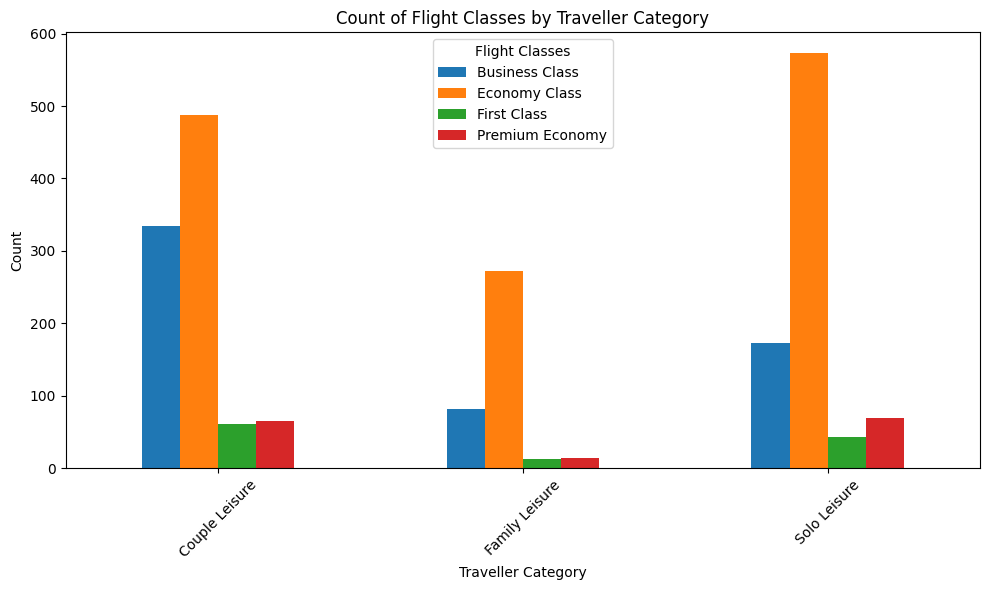

In [557]:
pivot_df = df_travbycls1.pivot(index='Traveller_Category', columns='Flight_classes', values='Count')

# Plotting
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Flight Classes by Traveller Category')
plt.xlabel('Traveller Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Classes')
plt.tight_layout()
plt.show()

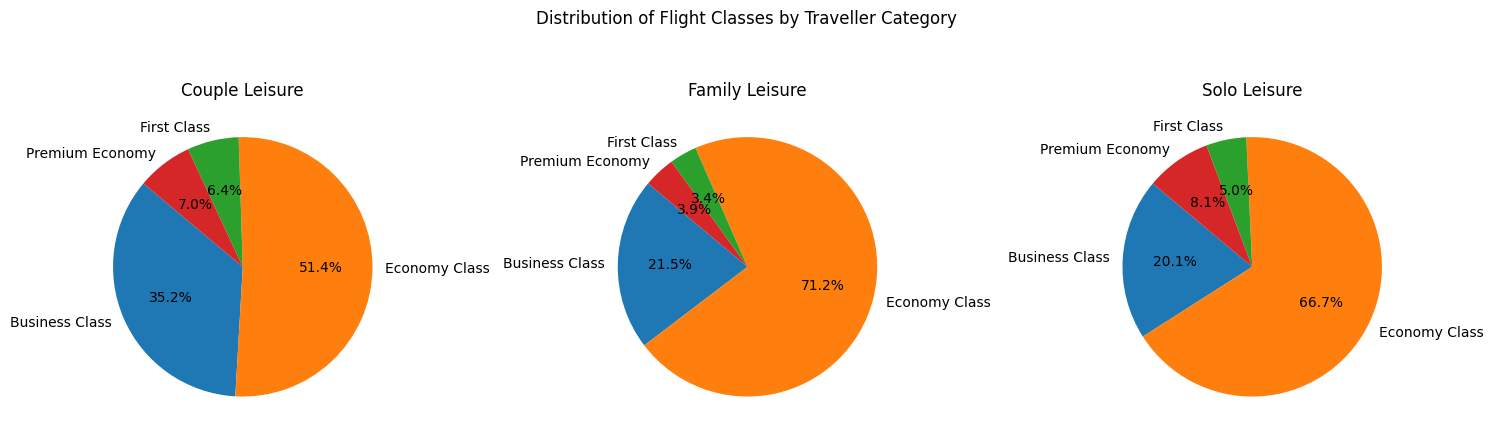

In [558]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over unique traveler categories
for i, category in enumerate(df_travbycls1['Traveller_Category'].unique()):
    # Filter data for the current category
    category_data = df_travbycls1[df_travbycls1['Traveller_Category'] == category]

    # Calculate counts for each flight class
    counts = category_data['Count']
    flight_classes = category_data['Flight_classes']

    # Plot pie chart for current category
    axs[i].pie(counts, labels=flight_classes, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(category)

plt.suptitle('Distribution of Flight Classes by Traveller Category')
plt.tight_layout()
plt.show()

In [559]:
df_trrt = df[['Traveller_Category', 'Flight_classes', 'Rating']]

In [560]:
df_trrt

,Traveller_Category,Flight_classes,Rating
0,Solo Leisure,Economy Class,1.0
1,Couple Leisure,Business Class,1.0
2,Solo Leisure,Business Class,2.0
3,Solo Leisure,Economy Class,4.0
4,Family Leisure,Business Class,7.0
...,...,...,...
3575,None,Economy Class,4.0
3576,None,Economy Class,4.0
3577,None,Economy Class,4.0
3578,None,Business Class,6.0


In [561]:
df_trrt1 = df_trrt.groupby(['Traveller_Category', 'Flight_classes'])['Rating'].mean().reset_index()

In [562]:
df_trrt1

,Traveller_Category,Flight_classes,Rating
0,Couple Leisure,Business Class,5.332335
1,Couple Leisure,Economy Class,3.823770
2,Couple Leisure,First Class,5.983607
3,Couple Leisure,Premium Economy,5.015152
4,Family Leisure,Business Class,5.743902
5,Family Leisure,Economy Class,3.992647
6,Family Leisure,First Class,4.230769
7,Family Leisure,Premium Economy,4.533333
8,Solo Leisure,Business Class,5.780347
9,Solo Leisure,Economy Class,4.589878


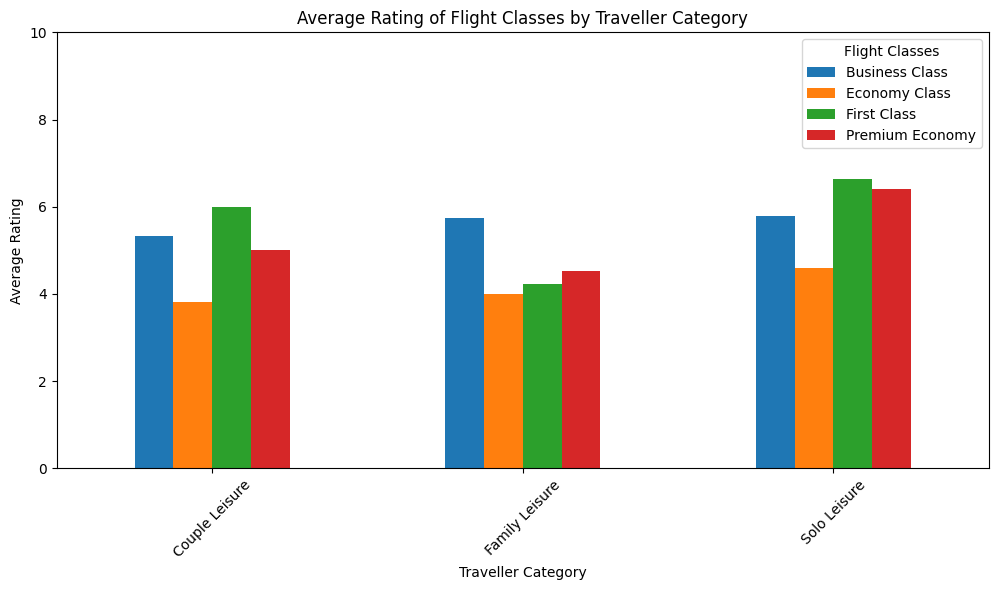

In [563]:
pivot_df1 = df_trrt1.pivot(index='Traveller_Category', columns='Flight_classes', values='Rating')

# Plotting
pivot_df1.plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating of Flight Classes by Traveller Category')
plt.xlabel('Traveller Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Flight Classes')
plt.tight_layout()
plt.ylim(0,10)
plt.show()

In [564]:
df_trrtmd = df_trrt.groupby(['Traveller_Category', 'Flight_classes'])['Rating'].agg(lambda x: x.mode()[0]).reset_index()

In [565]:
df_trrtmd

,Traveller_Category,Flight_classes,Rating
0,Couple Leisure,Business Class,1.0
1,Couple Leisure,Economy Class,1.0
2,Couple Leisure,First Class,9.0
3,Couple Leisure,Premium Economy,2.0
4,Family Leisure,Business Class,8.0
5,Family Leisure,Economy Class,1.0
6,Family Leisure,First Class,1.0
7,Family Leisure,Premium Economy,1.0
8,Solo Leisure,Business Class,8.0
9,Solo Leisure,Economy Class,1.0


<Figure size 1000x600 with 0 Axes>

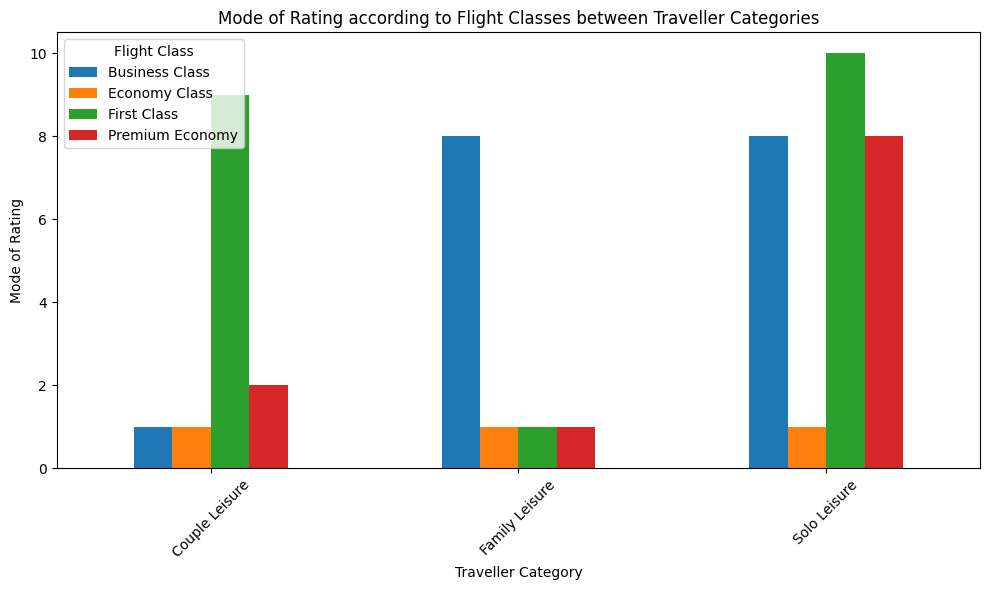

In [566]:
plt.figure(figsize=(10, 6))

pivot_df2 = df_trrtmd.pivot(index='Traveller_Category', columns='Flight_classes', values='Rating')

# Plotting
pivot_df2.plot(kind='bar', figsize=(10, 6))
plt.title('Mode of Rating according to Flight Classes between Traveller Categories')
plt.xlabel('Traveller Category')
plt.ylabel('Mode of Rating')
plt.xticks(rotation=45)
plt.legend(title='Flight Class')
plt.tight_layout()
plt.show()

In [567]:
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes,Traveller_Category
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class,Couple Leisure
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class,Family Leisure


### **Analysis According to the Travel Start and Travel Destination**

In [568]:
df['Flying_month'].value_counts().head(10)

Flying_month
nan       765
Aug-15     25
Mar-23     23
Sep-15     22
Apr-17     21
Dec-16     21
Jun-17     20
Sep-17     19
Mar-18     19
Jun-22     18
Name: count, dtype: int64

In [569]:
df['Route'].value_counts()

Route
nan                                 764
London to Johannesburg               16
London to Cape Town                  15
Johannesburg to London               14
BKK to LHR                           13
                                   ... 
London Heathrow to Delhi Airport      1
Belfast to Lisbon via London          1
Singapore to Heathrow                 1
Chicago to Chennai via London         1
Gatwick to Tobago                     1
Name: count, Length: 1528, dtype: int64

In [570]:
def split_start(start_airport):
  if 'to' in start_airport:
    return start_airport.split(' to')[0]
  else:
    return None

df['Starting_Airport'] = df['Route'].apply(split_start)

In [571]:
def split_finish(destination_airport):
  if 'to' in destination_airport:
    return destination_airport.split('to ')[1]
  else:
    return None

df['Destination_Airport'] = df['Route'].apply(split_finish)

In [572]:
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes,Traveller_Category,Starting_Airport,Destination_Airport
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure,New Orleans,London
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class,Couple Leisure,London,Amman
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class,Solo Leisure,Heathrow,Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure,Amman,London
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class,Family Leisure,London City,Ibiza


In [573]:
df['Starting_Airport'].value_counts().head(20)

Starting_Airport
London             495
LHR                320
London Heathrow    195
Gatwick            100
LGW                 73
Heathrow            59
London Gatwick      32
Johannesburg        27
Los Angeles         26
Vancouver           24
Singapore           24
Cape Town           24
New York            21
Miami               20
Chicago             20
Madrid              18
Dublin              18
Toronto             17
Glasgow             16
Sydney              16
Name: count, dtype: int64

In [574]:
df["Starting_Airport"] = df["Starting_Airport"].replace({"Gatwick": "London", 'London Heathrow': 'London', 'LGW': "London", 'Heathrow': 'London','LGW': 'London', 'London Gatwick': 'London'})

In [575]:
df["Starting_Airport"] = df["Starting_Airport"].replace({"LHR": "London", 'London City': 'London', 'London ': 'London'})

In [576]:
df['Starting_Airport'].value_counts().head(20)

Starting_Airport
London          1285
Johannesburg      27
Los Angeles       26
Cape Town         24
Singapore         24
Vancouver         24
New York          21
Chicago           20
Miami             20
Madrid            18
Dublin            18
Toronto           17
BKK               16
Amsterdam         16
Rome              16
Sydney            16
JFK               16
Glasgow           16
Edinburgh         15
Dubai             15
Name: count, dtype: int64

In [577]:
df['Starting_Airport'].isnull().sum()

788

In [578]:
df['Destination_Airport'].value_counts().head(20)

Destination_Airport
London             378
LHR                214
London Heathrow    159
Gatwick             76
LGW                 42
Heathrow            40
Cape Town           27
London Gatwick      23
Johannesburg        23
Dubai               19
Singapore           17
                    17
London              15
Hong Kong           15
Bangkok             15
Las Vegas           14
New York JFK        14
Malaga              14
Vancouver           14
Athens              13
Name: count, dtype: int64

In [579]:
df["Destination_Airport"] = df["Destination_Airport"].replace({"LHR": "London", 'London City': 'London', 'London ': 'London'})


In [580]:
df["Destination_Airport"] = df["Destination_Airport"].replace({"Gatwick": "London", 'London Heathrow': 'London', 'LGW': "London", 'Heathrow': 'London','LGW': 'London', 'London Gatwick': 'London'})

In [581]:
df["Destination_Airport"].value_counts().head(20)

Destination_Airport
London          960
Cape Town        27
Johannesburg     23
Dubai            19
                 17
Singapore        17
Hong Kong        15
Bangkok          15
Las Vegas        14
Vancouver        14
New York JFK     14
Malaga           14
Athens           13
MIA              13
Madrid           13
JFK              12
Los Angeles      12
AMS              11
Barbados         11
New York         11
Name: count, dtype: int64

In [582]:
df['Destination_Airport'] = df['Destination_Airport'].replace("", pd.NA)

In [583]:
df['Destination_Airport'].value_counts().head(10)

Destination_Airport
London          960
Cape Town        27
Johannesburg     23
Dubai            19
Singapore        17
Hong Kong        15
Bangkok          15
New York JFK     14
Las Vegas        14
Malaga           14
Name: count, dtype: int64

<Axes: xlabel='Destination_Airport'>

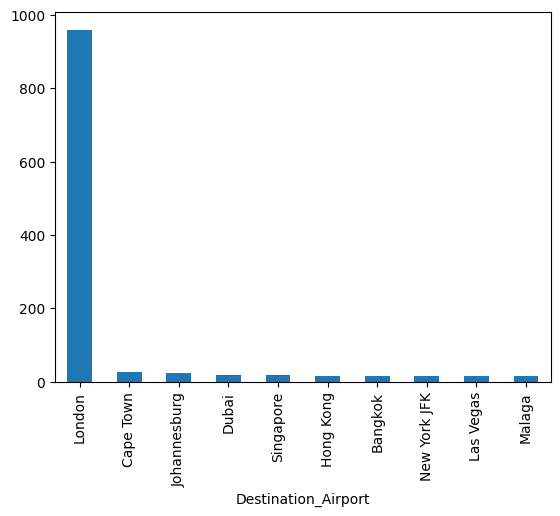

In [584]:
df['Destination_Airport'].value_counts().head(10).plot(kind = 'bar')

In [585]:
df['Starting_Airport'].value_counts().head(10)

Starting_Airport
London          1285
Johannesburg      27
Los Angeles       26
Cape Town         24
Singapore         24
Vancouver         24
New York          21
Chicago           20
Miami             20
Madrid            18
Name: count, dtype: int64

<Axes: xlabel='Starting_Airport'>

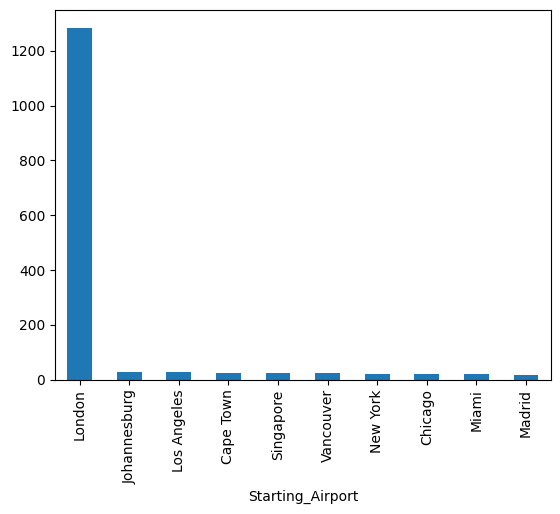

In [586]:
df['Starting_Airport'].value_counts().head(10).plot(kind = 'bar')

In [587]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_type', 'Class', 'Month',
       'Year', 'Flight_classes', 'Traveller_Category', 'Starting_Airport',
       'Destination_Airport'],
      dtype='object')

In [588]:
df_sa = df[['Starting_Airport','Rating']]

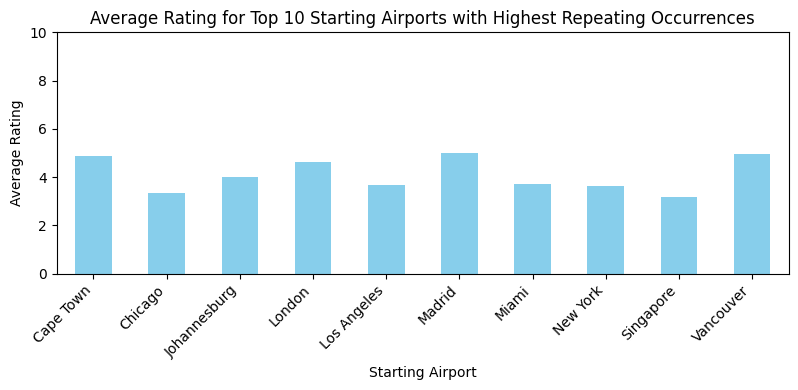

In [589]:
# Find top 10 startings with highest repeating occurrences
top_countries1 = df_sa['Starting_Airport'].value_counts().nlargest(10).index

# Filter DataFrame to include only top 10 startings
df_top_countries1 = df_sa[df_sa['Starting_Airport'].isin(top_countries1)]

# Calculate average rating for each starting
average_ratings1 = df_top_countries1.groupby('Starting_Airport')['Rating'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 4))
average_ratings1.plot(kind='bar', color='skyblue')
plt.title('Average Rating for Top 10 Starting Airports with Highest Repeating Occurrences')
plt.xlabel('Starting Airport')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0,10)
plt.show()

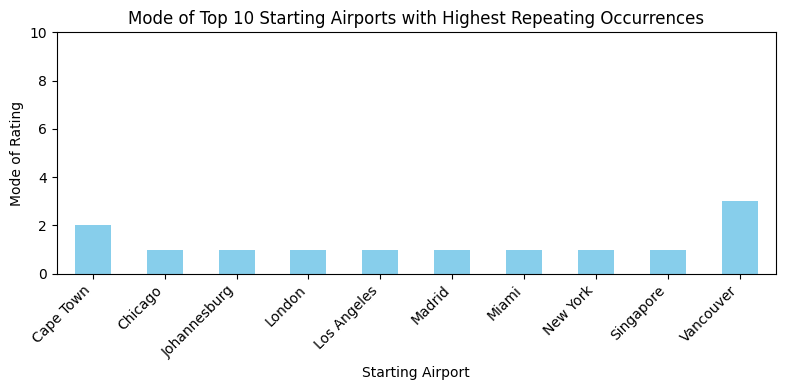

In [590]:
# Find top 10 startings with highest repeating occurrences
top_countries1 = df_sa['Starting_Airport'].value_counts().nlargest(10).index

# Filter DataFrame to include only top 10 startings
df_top_countries1 = df_sa[df_sa['Starting_Airport'].isin(top_countries1)]

# Calculate average rating for each starting
mode_ratings1 = df_top_countries1.groupby('Starting_Airport')['Rating'].agg(lambda x: x.mode()[0])

# Plotting the bar chart
plt.figure(figsize=(8, 4))
mode_ratings1.plot(kind='bar', color='skyblue')
plt.title('Mode of Top 10 Starting Airports with Highest Repeating Occurrences')
plt.xlabel('Starting Airport')
plt.ylabel('Mode of Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0,10)
plt.show()

In [591]:
df_dst1 = df[['Destination_Airport', 'Rating']]

In [592]:
df_dst1.head(20)

,Destination_Airport,Rating
0,London,1.0
1,Amman,1.0
2,Bodrum,2.0
3,London,4.0
4,Ibiza,7.0
5,Washington,1.0
6,London,1.0
7,Kalamata,7.0
8,Funchal,1.0
9,Seattle via London Heathrow,1.0


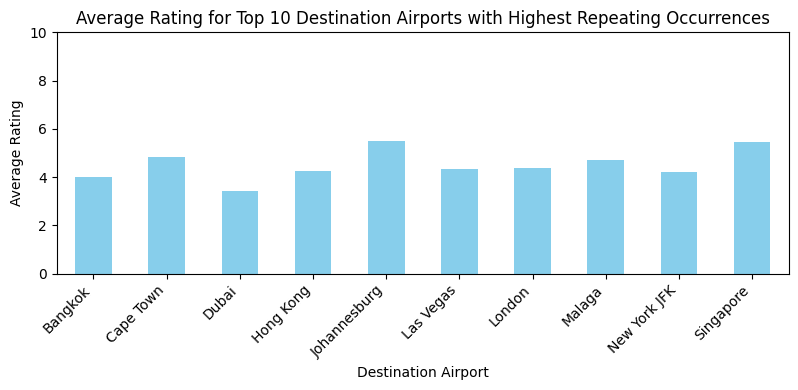

In [593]:
# Find top 10 destinations with highest repeating occurrences
top_countries = df_dst1['Destination_Airport'].value_counts().nlargest(10).index

# Filter DataFrame to include only top 10 destinations
df_top_countries = df_dst1[df_dst1['Destination_Airport'].isin(top_countries)]

# Calculate average rating for each destiation
average_ratings = df_top_countries.groupby('Destination_Airport')['Rating'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 4))
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating for Top 10 Destination Airports with Highest Repeating Occurrences')
plt.xlabel('Destination Airport')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0,10)
plt.show()

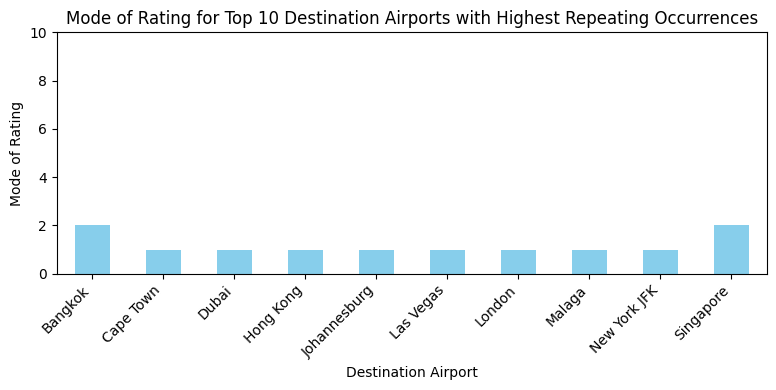

In [594]:
# Find top 10 destinations with highest repeating occurrences
top_countries = df_dst1['Destination_Airport'].value_counts().nlargest(10).index

# Filter DataFrame to include only top 10 destinations
df_top_countries = df_dst1[df_dst1['Destination_Airport'].isin(top_countries)]

# Calculate average rating for each destiation
mode_ratings = df_top_countries.groupby('Destination_Airport')['Rating'].agg(lambda x: x.mode()[0])

# Plotting the bar chart
plt.figure(figsize=(8, 4))
mode_ratings.plot(kind='bar', color='skyblue')
plt.title('Mode of Rating for Top 10 Destination Airports with Highest Repeating Occurrences')
plt.xlabel('Destination Airport')
plt.ylabel('Mode of Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0,10)
plt.show()

### **Hypothysis Testing**

In [595]:
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Month,Year,Flight_classes,Traveller_Category,Starting_Airport,Destination_Airport
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure,New Orleans,London
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,Mar,2023,Business Class,Couple Leisure,London,Amman
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Not Given,Not Given,Business Class,Solo Leisure,London,Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,Jun,2023,Economy Class,Solo Leisure,Amman,London
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,Not Given,Not Given,Business Class,Family Leisure,London,Ibiza


In [596]:
from scipy.stats import f_oneway

In [597]:
df.columns

Index(['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Verified',
       'Review_title', 'Review_content', 'Traveller_type', 'Class', 'Month',
       'Year', 'Flight_classes', 'Traveller_Category', 'Starting_Airport',
       'Destination_Airport'],
      dtype='object')

In [598]:
df_test = df[['Month', 'Year', 'Rating', 'Verified', 'Traveller_Category', 'Flight_classes', 'Starting_Airport', 'Destination_Airport']]

### **Hypothesis:**

**Null Hypothesis (H0)**: There is no significant difference in ratings between different traveler categories.

**Alternative Hypothesis (H1)**: There is a significant difference in ratings between different traveler categories.

In [599]:
# Assuming df_abtest is your DataFrame containing the selected subset of data
# Let's first check for any missing values in the 'Rating' and 'Traveller_Category' columns
df_test.dropna(subset=['Rating', 'Traveller_Category'], inplace=True)

# Group the ratings by traveler categories
grouped_data = df_test.groupby('Traveller_Category')['Rating']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between different traveler categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between different traveler categories.")

F-Statistic: 8.266396741010896
P-Value: 0.00026512153098036054
Reject the null hypothesis. There is a significant difference in ratings between different traveler categories.


<ipython-input-599-ace5ed79e904>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['Rating', 'Traveller_Category'], inplace=True)


### **Hypothesis:**

**Null Hypothesis (H0)**: There is no significant difference in ratings between different flight classes.

**Alternative Hypothesis (H1)**: There is a significant difference in ratings between different flight classes.

In [600]:
# Assuming df_abtest is your DataFrame containing the selected subset of data
# Let's first check for any missing values in the 'Rating' and 'Flight Classes' columns
df_test.dropna(subset=['Rating', 'Flight_classes'], inplace=True)

# Group the ratings by flight classes
grouped_data = df_test.groupby('Flight_classes')['Rating']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between different flight classes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between different flight classes.")

F-Statistic: 37.108407137464454
P-Value: 2.187243351108357e-23
Reject the null hypothesis. There is a significant difference in ratings between different flight classes.


<ipython-input-600-70e616403959>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['Rating', 'Flight_classes'], inplace=True)


### **Hypothesis:**

**Null Hypothesis (H0)**: There is no significant difference in ratings between different Starting Airport.

**Alternative Hypothesis (H1)**: There is a significant difference in ratings between different Starting Airport.

In [601]:
# Assuming df_abtest is your DataFrame containing the selected subset of data
# Let's first check for any missing values in the 'Rating' and 'Starting Airport' columns
df_test.dropna(subset=['Rating', 'Starting_Airport'], inplace=True)

# Group the ratings by starting airport
grouped_data = df_test.groupby('Starting_Airport')['Rating']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between different # Group the ratings by starting airport.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between different # Group the ratings by starting airport.")

F-Statistic: 1.2192957817387722
P-Value: 0.008039219943858377
Reject the null hypothesis. There is a significant difference in ratings between different # Group the ratings by starting airport.


<ipython-input-601-06c63022f2af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['Rating', 'Starting_Airport'], inplace=True)


### **Hypothesis:**
### **Null Hypothesis (H0):** There is no significant difference in ratings between different Destination Airport.

### A**lternative Hypothesis (H1):** There is a significant difference in ratings between different Destination Airport.

In [602]:
# Assuming df_abtest is your DataFrame containing the selected subset of data
# Let's first check for any missing values in the 'Rating' and 'Destination Airport' columns
df_test.dropna(subset=['Rating', 'Destination_Airport'], inplace=True)

# Group the ratings by destination airport
grouped_data = df_test.groupby('Destination_Airport')['Rating']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between different # Group the ratings by destination airport.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between different # Group the ratings by destination airport.")

F-Statistic: 1.1037336681817298
P-Value: 0.07222699173029744
Fail to reject the null hypothesis. There is no significant difference in ratings between different # Group the ratings by destination airport.


<ipython-input-602-cc4401ad7a9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['Rating', 'Destination_Airport'], inplace=True)


### **Hypothesis:**

**Null Hypothesis (H0)**: There is no significant difference in ratings between different traveler categories.

**Alternative Hypothesis (H1)**: There is a significant difference in ratings between different traveler categories.

In [603]:
# Assuming df_abtest is your DataFrame containing the selected subset of data
# Let's first check for any missing values in the 'Rating' and 'Flying Month' columns
df_test.dropna(subset=['Rating', 'Month'], inplace=True)

# Group the ratings by flying month
grouped_data = df_test.groupby('Month')['Rating']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*[group for name, group in grouped_data])

# Print the results
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between different # Group the ratings by flying month.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between different # Group the ratings by flying month.")

F-Statistic: 26.163993416630127
P-Value: 8.245789993356593e-60
Reject the null hypothesis. There is a significant difference in ratings between different # Group the ratings by flying month.


<ipython-input-603-03d6ddc7384e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset=['Rating', 'Month'], inplace=True)


###**Perform T-Test to Flight Classes**

In [604]:
from scipy import stats
import seaborn as sns

### **Hypothesis:**
### **Null Hypothesis (H0):** There is no significant difference in ratings between different flight classes.

### A**lternative Hypothesis (H1):** There is a significant difference in ratings between different flight classes.

In [605]:
# Splitting the DataFrame into two groups based on flight class
economy_ratings = df_test[df_test['Flight_classes'] == 'Economy Class']['Rating']
business_ratings = df_test[df_test['Flight_classes'] == 'Business Class']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(economy_ratings, business_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between economy and business classes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between economy and business classes")

T-statistic: -8.643145818591101
P-value: 1.1414939926347088e-17
Reject the null hypothesis. There is a significant difference in ratings between economy and business classes.


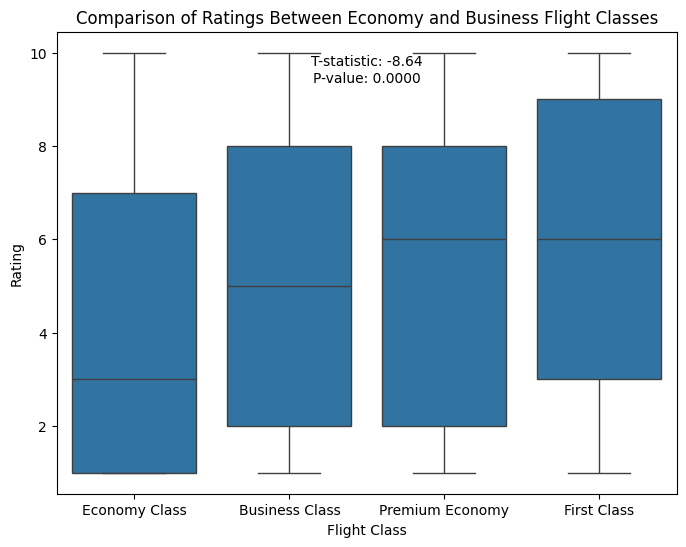

In [606]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Flight_classes', y='Rating', data=df)

# Adding statistical annotations
t_statistic, p_value = stats.ttest_ind(economy_ratings, business_ratings)
plt.text(0.5, 0.95, f'T-statistic: {t_statistic:.2f}\nP-value: {p_value:.4f}',
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)

# Adding labels and title
plt.xlabel('Flight Class')
plt.ylabel('Rating')
plt.title('Comparison of Ratings Between Economy and Business Flight Classes')

# Displaying the plot
plt.show()

In [607]:
# Splitting the DataFrame into two groups based on flight class
economy_ratings = df_test[df_test['Flight_classes'] == 'Economy Class']['Rating']
premium_economy_ratings = df_test[df_test['Flight_classes'] == 'Premium Economy']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(economy_ratings, premium_economy_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between economy and premium economy.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between economy and premium economy.")

T-statistic: -5.096388413062028
P-value: 3.9134934551566977e-07
Reject the null hypothesis. There is a significant difference in ratings between economy and premium economy.


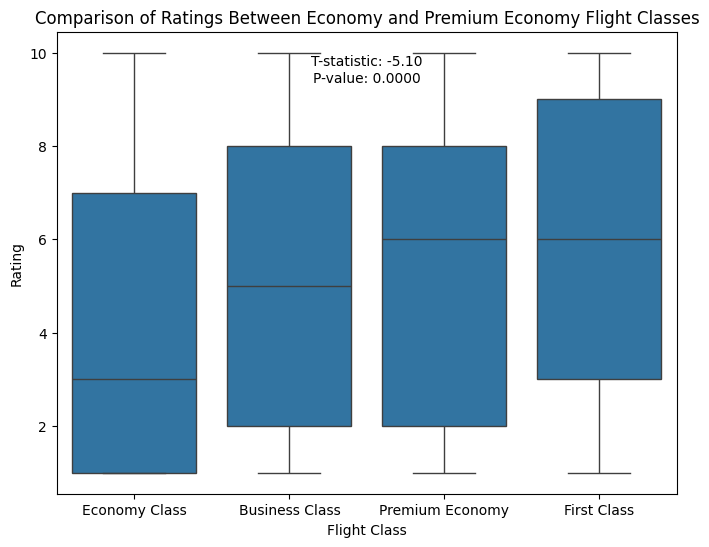

In [608]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Flight_classes', y='Rating', data=df)

# Adding statistical annotations
t_statistic, p_value = stats.ttest_ind(economy_ratings, premium_economy_ratings)
plt.text(0.5, 0.95, f'T-statistic: {t_statistic:.2f}\nP-value: {p_value:.4f}',
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)

# Adding labels and title
plt.xlabel('Flight Class')
plt.ylabel('Rating')
plt.title('Comparison of Ratings Between Economy and Premium Economy Flight Classes')

# Displaying the plot
plt.show()

In [609]:
# Splitting the DataFrame into two groups based on flight class
first_ratings = df_test[df_test['Flight_classes'] == 'First Class']['Rating']
premium_economy_ratings = df_test[df_test['Flight_classes'] == 'Premium Economy']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(first_ratings, premium_economy_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between first and premium economy.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between first and premium economy.")

T-statistic: 1.16873437755469
P-value: 0.2435770219224498
Fail to reject the null hypothesis. There is no significant difference in ratings between first and premium economy.


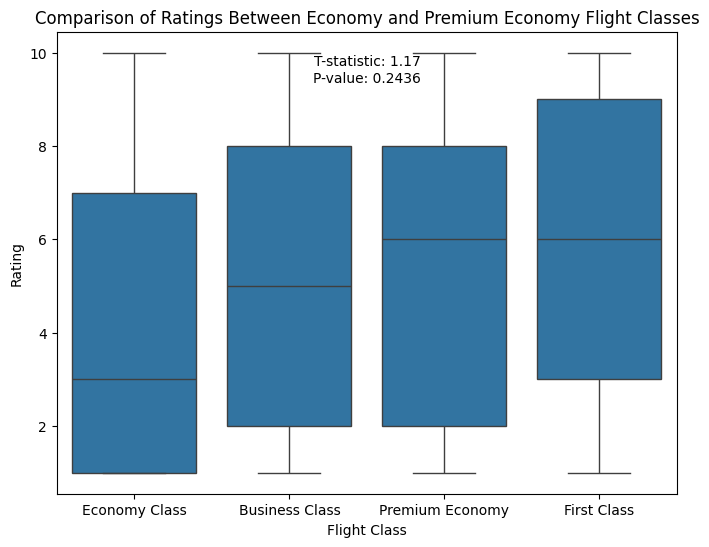

In [610]:
# Creating a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Flight_classes', y='Rating', data=df)

# Adding statistical annotations
t_statistic, p_value = stats.ttest_ind(first_ratings, premium_economy_ratings)
plt.text(0.5, 0.95, f'T-statistic: {t_statistic:.2f}\nP-value: {p_value:.4f}',
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)

# Adding labels and title
plt.xlabel('Flight Class')
plt.ylabel('Rating')
plt.title('Comparison of Ratings Between Economy and Premium Economy Flight Classes')

# Displaying the plot
plt.show()

In [611]:
# Splitting the DataFrame into two groups based on flight class
first_ratings = df_test[df_test['Flight_classes'] == 'First Class']['Rating']
business_ratings = df_test[df_test['Flight_classes'] == 'Business Class']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(first_ratings, business_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between business class and first class.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between business and first class.")

T-statistic: 1.5550369473290842
P-value: 0.1203924987363051
Fail to reject the null hypothesis. There is no significant difference in ratings between business and first class.


In [612]:
# Splitting the DataFrame into two groups based on flight class
first_ratings = df_test[df_test['Flight_classes'] == 'First Class']['Rating']
economy_ratings_ratings = df_test[df_test['Flight_classes'] == 'Economy Class']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(first_ratings, economy_ratings_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between first class class and economy economy.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between first class and economy economy.")

T-statistic: 6.025690633437271
P-value: 2.137896741470815e-09
Reject the null hypothesis. There is a significant difference in ratings between first class class and economy economy.


In [613]:
# Splitting the DataFrame into two groups based on flight class
premium_economy_ratings = df_test[df_test['Flight_classes'] == 'First Class']['Rating']
business_ratings = df_test[df_test['Flight_classes'] == 'Business Class']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(premium_economy_ratings, business_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between business class and premium economy class.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between business and premium economy class.")

T-statistic: 1.5550369473290842
P-value: 0.1203924987363051
Fail to reject the null hypothesis. There is no significant difference in ratings between business and premium economy class.


**Hypothesis:**
### **Null Hypothesis (H0)**: There is no significant difference in ratings between different traveler categories.

### **Alternative Hypothesis (H1)**: There is a significant difference in ratings between different traveler categories.

In [614]:
# Splitting the DataFrame into two groups based on traveller category
solo_ratings = df[df['Traveller_Category'] == 'Solo Leisure']['Rating']
family_ratings = df[df['Traveller_Category'] == 'Family Leisure']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(solo_ratings, family_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between solo leisure and family leisure.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between solo leisure and family leisure.")

T-statistic: 3.4338388492023646
P-value: 0.0006147373772034122
Reject the null hypothesis. There is a significant difference in ratings between solo leisure and family leisure.


In [615]:
# Splitting the DataFrame into two groups based on traveller category
solo_ratings = df[df['Traveller_Category'] == 'Solo Leisure']['Rating']
couple_ratings = df[df['Traveller_Category'] == 'Couple Leisure']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(solo_ratings, couple_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between solo leisure and couple leisure.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between solo leisure and couple leisure.")

T-statistic: 3.338758035061934
P-value: 0.0008586398465430736
Reject the null hypothesis. There is a significant difference in ratings between solo leisure and couple leisure.


In [616]:
# Splitting the DataFrame into two groups based on traveller category
family_ratings = df[df['Traveller_Category'] == 'Family Leisure']['Rating']
couple_ratings = df[df['Traveller_Category'] == 'Couple Leisure']['Rating']

# Performing the t-test
t_statistic, p_value = stats.ttest_ind(family_ratings, couple_ratings)

# Printing the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in ratings between family leisure and couple leisure.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ratings between family leisure and couple leisure.")

T-statistic: -0.9367035822960817
P-value: 0.3490812341358752
Fail to reject the null hypothesis. There is no significant difference in ratings between family leisure and couple leisure.


### **Perform Z-Test for Traveller Categories**

### **Hypothesis:**
### **Null Hypothesis (H0)**: There is no significant difference in ratings between different traveler categories.

### **Alternative Hypothesis (H1)**: There is a significant difference in ratings between different traveler categories.

In [617]:
population_std = df_test['Rating'].std()

In [618]:
population_std

3.1776446827978537

In [619]:
# Splitting the DataFrame into two groups based on traveller category
solo_ratings = df[df['Traveller_Category'] == 'Solo Leisure']['Rating']
family_ratings = df[df['Traveller_Category'] == 'Family Leisure']['Rating']

# Calculating sample means and sizes
solo_mean = solo_ratings.mean()
family_mean = family_ratings.mean()
solo_size = solo_ratings.size
family_size = family_ratings.size

# Calculating the standard error of the difference between means
standard_error = population_std / (solo_size**0.5 + family_size**0.5)

# Calculating the Z-score
Z = (solo_mean - family_mean) / standard_error

# Assuming a 95% confidence level
alpha = 0.05
# Critical Z-value for a two-tailed test
critical_Z = stats.norm.ppf(1 - alpha / 2)

# Printing the Z-score and critical value
print("Z-score:", Z)
print("Critical Z-value:", critical_Z)

# Comparing the Z-score to the critical value
if abs(Z) > critical_Z:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

Z-score: 10.404427281227001
Critical Z-value: 1.959963984540054
Reject the null hypothesis. There is a significant difference between the means.


In [620]:
# Splitting the DataFrame into two groups based on traveller category
solo_ratings = df[df['Traveller_Category'] == 'Solo Leisure']['Rating']
couple_ratings = df[df['Traveller_Category'] == 'Couple Leisure']['Rating']

# Calculating sample means and sizes
solo_mean = solo_ratings.mean()
couple_mean = couple_ratings.mean()
solo_size = solo_ratings.size
couple_size = couple_ratings.size

# Calculating the standard error of the difference between means
standard_error = population_std / (solo_size**0.5 + couple_size**0.5)

# Calculating the Z-score
Z = (solo_mean - couple_mean) / standard_error

# Assuming a 95% confidence level
alpha = 0.05
# Critical Z-value for a two-tailed test
critical_Z = stats.norm.ppf(1 - alpha / 2)

# Printing the Z-score and critical value
print("Z-score:", Z)
print("Critical Z-value:", critical_Z)

# Comparing the Z-score to the critical value
if abs(Z) > critical_Z:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

Z-score: 9.424239247313952
Critical Z-value: 1.959963984540054
Reject the null hypothesis. There is a significant difference between the means.


In [621]:
# Splitting the DataFrame into two groups based on traveller category
family_ratings = df[df['Traveller_Category'] == 'Family Leisure']['Rating']
couple_ratings = df[df['Traveller_Category'] == 'Couple Leisure']['Rating']

# Calculating sample means and sizes
family_mean = family_ratings.mean()
couple_mean = couple_ratings.mean()
family_size = family_ratings.size
couple_size = couple_ratings.size

# Calculating the standard error of the difference between means
standard_error = population_std / (solo_size**0.5 + couple_size**0.5)

# Calculating the Z-score
Z = (solo_mean - couple_mean) / standard_error

# Assuming a 95% confidence level
alpha = 0.05
# Critical Z-value for a two-tailed test
critical_Z = stats.norm.ppf(1 - alpha / 2)

# Printing the Z-score and critical value
print("Z-score:", Z)
print("Critical Z-value:", critical_Z)

# Comparing the Z-score to the critical value
if abs(Z) > critical_Z:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

Z-score: 9.424239247313952
Critical Z-value: 1.959963984540054
Reject the null hypothesis. There is a significant difference between the means.


### **Chi-Square Test for Traveller Type and Flight Class**

###** Hypothesis:**
### **Null Hypothesis (H0):** here is no association between the type of traveler category (e.g., Solo Traveler, Family Traveler) and the type of flight class (e.g., Economy, Business, Premium Economy, First Class).
### **Alternative Hypothesis (H1):** here is a association between the type of traveler category (e.g., Solo Traveler, Family Traveler) and the type of flight class (e.g., Economy, Business, Premium Economy, First Class).

In [622]:
from scipy.stats import chi2_contingency

In [623]:
df_chi = df_test[['Traveller_Category', 'Flight_classes']]

In [624]:
# Create a contingency table
contingency_table = pd.crosstab(df_chi['Traveller_Category'], df_chi['Flight_classes'])

# Perform the chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


if p_val < alpha:
    print("Reject the null hypothesis. There is no association between traveller category and flight class.")
else:
    print("Fail to reject the null hypothesis. There is an association between traveller category and flight class.")

Chi-square statistic: 77.48657294974636
P-value: 1.1797144440186664e-14
Degrees of freedom: 6
Expected frequencies table:
[[252.60869565 573.04347826  50.43478261  63.91304348]
 [100.77474561 228.60777058  20.12025902  25.49722479]
 [227.61655874 516.34875116  45.44495837  57.58973173]]
Reject the null hypothesis. There is no association between traveller category and flight class.


In [625]:
from scipy.stats import chi2

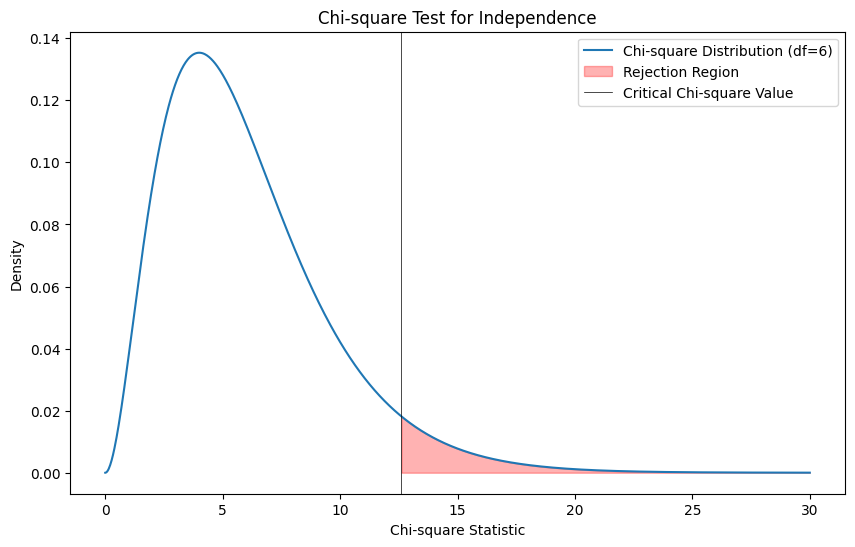

In [626]:
alpha = 0.05
df_chi2 = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)  # degrees of freedom
critical_chi2 = chi2.ppf(1 - alpha, df_chi2)

# Create an array of x values for the chi-square distribution plot
x = np.linspace(0, 30, 1000)  # Adjust the range according to your data

# Plot the chi-square distribution
plt.figure(figsize=(10, 6))
plt.plot(x, chi2.pdf(x, df_chi2), label=f'Chi-square Distribution (df={df_chi2})')

# Highlight the rejection region
plt.fill_between(x, chi2.pdf(x, df_chi2), where=(x >= critical_chi2), color='red', alpha=0.3, label='Rejection Region')

# Plot the critical chi-square value
plt.axvline(critical_chi2, color='black', linestyle='-', linewidth=0.5, label='Critical Chi-square Value')

# Add labels and legend
plt.title('Chi-square Test for Independence')
plt.xlabel('Chi-square Statistic')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()